In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients


# Data set

In [2]:
x_train = np.array([1.0, 2.0]) #features
y_train = np.array([300.0, 500.0]) #target

# Compute_Cost

In [3]:
#Function to compute the cost
def compute_cost (x,y,w,b):
    #no of training examples
    m = len(x)
    cost = 0
    
    for i in range(m):
        #model
        f_wb = w * x[i] + b
        #computing cost
        cost = cost + (f_wb - y[i]) **2
    total_cost = 1/(2*m) * cost
    return total_cost

# Gradient Descent

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 



$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

Fucntion below will give us the derivative of cost function with respect to w and b 

In [4]:
def compute_gradient (x, y, w, b):
    m = len(x)
    #gradient of the cost w.r.t w
    dj_dw = 0
    #gradient of the cost w.r.t b
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    
    #according to the mathmatical form
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw , dj_db

We have calculated equation 4 and 5 in above function

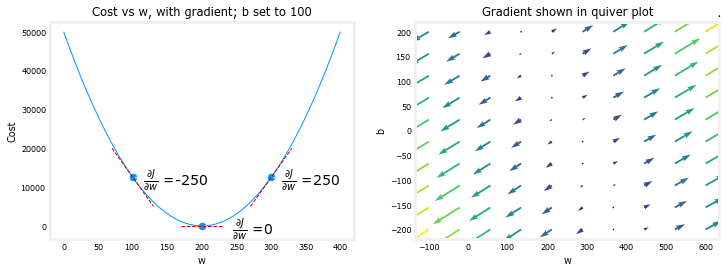

In [5]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

Now that gradients can be computed, gradient descent, described in equation (3) above can be implemented below in gradient_descent. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of  𝑤  and  𝑏  on the training data.

In [8]:
def gradient_descent (x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)
    #an array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        #calculating the gradient using function we have above
        dj_dw , dj_db = gradient_function(x, y, w, b)
        
        #updating parameters according to equation of gradient descent
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        #save cost J at each iteration
        if i<1000000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w,b])
        # Print cost every ar intervals 10 ties or as many iterations if < 10
        if i%math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}",
                 f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}",
                 f"w: {w:0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history

In [9]:
w_init = 0
b_init = 0
#settings for gradient descent
iterations = 10000
tmp_alpha = 1.0e-2
#run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,
                                                   iterations, compute_cost, compute_gradient)

print(f"(w.b) found by Gradient Descenet: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00 dj_dw: -3.712e-01, dj_db:  6.007e-01 w: 1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01 dj_dw: -1.789e-01, dj_db:  2.895e-01 w: 1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01 dj_dw: -8.625e-02, dj_db:  1.396e-01 w: 1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02 dj_dw: -4.158e-02, dj_db:  6.727e-02 w: 1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03 dj_dw: -2.004e-02, dj_db:  3.243e-02 w: 1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03 dj_dw: -9.660e-03, dj_db:  1.563e-02 w: 1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04 dj_dw: -4.657e-03, dj_db:  7.535e-03 w: 1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04 dj_dw: -2.245e-03, dj_db:  3.632e-03 w: 2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05 dj_dw: -1.082e-03, dj_db:  1.751e-03 w: 2.000e+02, b: 1.00024e+02
(w.b) found by Gradient Descenet: (199.9

# Cost versus iterations of gradient descent


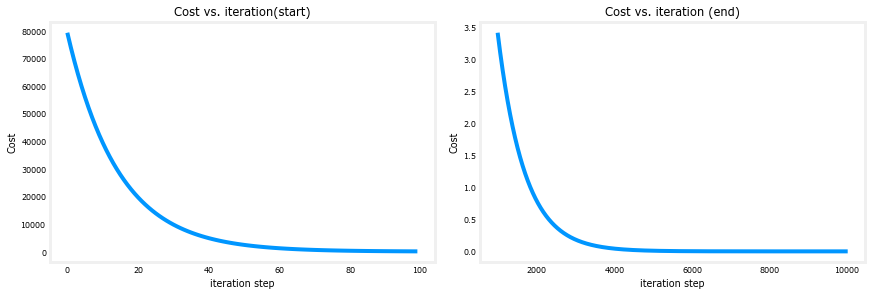

In [14]:
# plot cost versus iteration 
                        #1 row 2 columns of plot 
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
#plotting from ist value to 100th of array
ax1.plot(J_hist[:100])
#The change in cost is so rapid initially, it is useful to plot the 
#initial decent on a different scale than the final descent.


#so now plotting the ending values of desent
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

As we can learly see from the above figures as the iteration step means gradient desent has benn running (values of w and b updated simultaneouly) the value of cost has been going down

# Predictions


Now that you have discovered the optimal values for the parameters  𝑤  and  𝑏 , you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [16]:
#as this is linear regrssion model
#so for the equation that represent this model is : f(x) = w * x + b
#so we are giving input which is size of house (x)
#for 1000 sqft we are giving 1.0 and so on
                                                #to get one deimal digit value 
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prdiction  {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prdiction  500.0 Thousand dollars


# Plotting

You can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b).

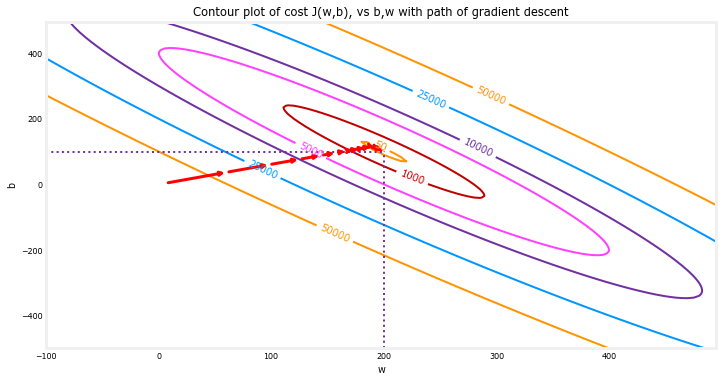

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

**Zooming in**, we can see that final steps of gradient descent. Note the distance between steps shrinks as the gradient approaches zero.

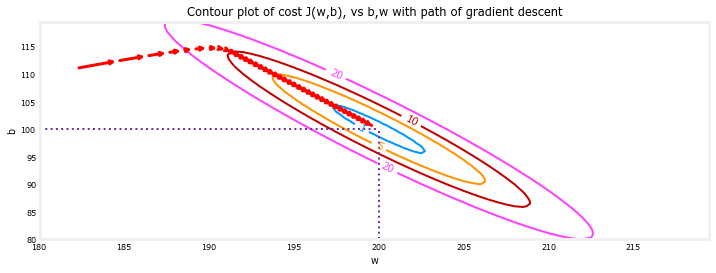

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

# Increasing Learning Rate

The larger  𝛼  is, the faster gradient descent will converge to a solution. But, if it is too large, gradient descent will diverge. Above you have an example of a solution which converges nicely.
Let's try increasing the value of  𝛼  and see what happens:

In [22]:
w_init = 0
b_init = 0
#setting alpha to large value
iterations = 10
tmp_alpha = 8.0e-1
#run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations,
                                                    compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05 dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05 dj_dw:  1.130e+03, dj_db:  7.000e+02 w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06 dj_dw: -1.970e+03, dj_db: -1.216e+03 w: 1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06 dj_dw:  3.429e+03, dj_db:  2.121e+03 w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07 dj_dw: -5.974e+03, dj_db: -3.691e+03 w: 3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07 dj_dw:  1.040e+04, dj_db:  6.431e+03 w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08 dj_dw: -1.812e+04, dj_db: -1.120e+04 w: 9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08 dj_dw:  3.156e+04, dj_db:  1.950e+04 w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09 dj_dw: -5.496e+04, dj_db: -3.397e+04 w: 2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09 dj_dw:  9.572e+04, dj_db:  5.916e+04 w: -4.845e+04, b:-2.99567e+04


Above, $w$ and $b$ are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Further, each iteration $\frac{\partial J(w,b)}{\partial w}$ changes sign and cost is increasing rather than decreasing. This is a clear sign that the *learning rate is too large* and the solution is diverging. 
Let's visualize this with a plot.